In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from nselib import capital_market

# NSE Library to Python!

pip install nselib

In [2]:
#a=(capital_market.price_volume_and_deliverable_position_data(symbol='INFY',from_date='26-03-2023',to_date='28-03-2024'));a.head()

In [3]:
#a = capital_market.price_volume_and_deliverable_position_data(symbol='INFY',from_date='26-03-2023',to_date='26-03-2024');a.info()

In [4]:
j=['INFY','ITC','SBIN','APOLLOHOSP','TATAPOWER']
data_set = pd.DataFrame()

for symbol in j:
    a=capital_market.price_volume_and_deliverable_position_data(symbol=symbol,from_date='26-03-2023',to_date='26-03-2024')
    data_set[symbol]=a.ClosePrice

In [5]:
data_set.head()

,INFY,ITC,SBIN,APOLLOHOSP,TATAPOWER
0,"1,388.95",380.20,510.15,"4,318.10",186.65
1,"1,377.60",379.75,508.10,"4,333.60",183.95
2,"1,383.55",382.75,516.50,"4,363.00",185.50
3,"1,427.95",383.50,523.75,"4,310.90",190.25
4,"1,410.85",378.90,526.75,"4,234.35",193.95


In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   INFY        251 non-null    object 
 1   ITC         248 non-null    float64
 2   SBIN        248 non-null    float64
 3   APOLLOHOSP  248 non-null    object 
 4   TATAPOWER   248 non-null    float64
dtypes: float64(3), object(2)
memory usage: 9.9+ KB


In [7]:
for column in data_set.columns:
    if data_set[column].dtype == 'object':
        try:
            data_set[column] = data_set[column].str.replace(',', '').astype(float)
        except ValueError:
            print(f"Unable to convert column '{column}' to float type.")

In [8]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   INFY        251 non-null    float64
 1   ITC         248 non-null    float64
 2   SBIN        248 non-null    float64
 3   APOLLOHOSP  248 non-null    float64
 4   TATAPOWER   248 non-null    float64
dtypes: float64(5)
memory usage: 9.9 KB


In [9]:
data = data_set.pct_change(); data.head()

,INFY,ITC,SBIN,APOLLOHOSP,TATAPOWER
0,NaN,NaN,NaN,NaN,NaN
1,-0.008172,-0.001184,-0.004018,0.003590,-0.014466
2,0.004319,0.007900,0.016532,0.006784,0.008426
3,0.032091,0.001960,0.014037,-0.011941,0.025606
4,-0.011975,-0.011995,0.005728,-0.017757,0.019448


In [10]:
avg_ret = data.mean(axis=0)
avg_ret=list(avg_ret);print(avg_ret)
avg_ret1=np.array(avg_ret).reshape(5,1);print(avg_ret1)
#avg_ret=list(avg_ret);print(avg_ret)

[0.0004101343707659435, 0.0005327747146656292, 0.0015705701464820941, 0.0016225283273757665, 0.003130166909005804]
[[0.00041013]
 [0.00053277]
 [0.00157057]
 [0.00162253]
 [0.00313017]]


In [11]:
cov=data.cov();print(cov)

                INFY       ITC      SBIN  APOLLOHOSP  TATAPOWER
INFY        0.000243  0.000009 -0.000009    0.000004  -0.000009
ITC         0.000009  0.000125  0.000027    0.000026   0.000024
SBIN       -0.000009  0.000027  0.000164    0.000029   0.000092
APOLLOHOSP  0.000004  0.000026  0.000029    0.000194   0.000021
TATAPOWER  -0.000009  0.000024  0.000092    0.000021   0.000359


In [12]:
cov=np.array(cov).reshape(5,5);cov
#cov1=cov*252;cov1

array([[ 2.43282407e-04,  8.75135249e-06, -9.31341696e-06,
         3.54458510e-06, -8.75446727e-06],
       [ 8.75135249e-06,  1.25013427e-04,  2.71963247e-05,
         2.60363644e-05,  2.38036342e-05],
       [-9.31341696e-06,  2.71963247e-05,  1.63855915e-04,
         2.86030002e-05,  9.15932350e-05],
       [ 3.54458510e-06,  2.60363644e-05,  2.86030002e-05,
         1.94151187e-04,  2.06796423e-05],
       [-8.75446727e-06,  2.38036342e-05,  9.15932350e-05,
         2.06796423e-05,  3.58811678e-04]])

In [13]:
def portfolio_ret(avg_ret,cov):
    wt=np.random.normal(5,size=(5,1))
    wt=wt/np.sum(wt)
    portfolio_ret = np.transpose(avg_ret)@wt
    portfolio_vol=np.transpose(wt)@cov@wt
    return portfolio_ret, portfolio_vol

In [14]:
def repeat(alg,avg_ret,cov,times):
    DV=[]
    for i in range(times):
        output=alg(avg_ret,cov)
        DV.append(output)
    return DV

In [15]:
Pr=repeat(portfolio_ret,avg_ret1,cov,10000)

In [16]:
df=pd.DataFrame(Pr,columns=['returns','volatility']);df.head()

,returns,volatility
0,[[0.0014628012506201086]],[[6.0233245337949e-05]]
1,[[0.0017195083603965997]],[[7.827267709962464e-05]]
2,[[0.001421735002651005]],[[5.960354523671727e-05]]
3,[[0.0013634185634126697]],[[5.6828036639390325e-05]]
4,[[0.0014160180035549842]],[[6.248764971922619e-05]]


In [17]:
#for min_var and Max_sharp

m = (avg_ret1-0.0001)#  vector of excess returns
cov_inv =np.linalg.inv(cov)
ones=[1,1,1,1,1]
ones=np.array(ones).reshape(1,5)

min_var_wt = (cov_inv@np.transpose(ones))/(ones@cov_inv@np.transpose(ones))
max_sharp_wta = (cov_inv@m)/(ones@cov_inv@m)

min_var_ret = np.transpose(avg_ret)@min_var_wt
min_var_vol=np.transpose(min_var_wt)@cov@min_var_wt

max_sharp_reta= np.transpose(avg_ret1)@max_sharp_wta
max_sharp_vola = np.transpose(max_sharp_wta)@cov@max_sharp_wta

pip install PyPortfolioOpt

In [18]:
data_set

,INFY,ITC,SBIN,APOLLOHOSP,TATAPOWER
0,1388.95,380.20,510.15,4318.10,186.65
1,1377.60,379.75,508.10,4333.60,183.95
2,1383.55,382.75,516.50,4363.00,185.50
3,1427.95,383.50,523.75,4310.90,190.25
4,1410.85,378.90,526.75,4234.35,193.95
...,...,...,...,...,...
246,1561.45,428.60,746.70,6375.90,390.70
247,1554.95,427.65,740.05,6322.45,390.10
248,1554.70,NaN,NaN,NaN,NaN
249,1508.85,NaN,NaN,NaN,NaN


In [19]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

Mu = mean_historical_return(data_set)
S = CovarianceShrinkage(data_set).ledoit_wolf()

(CVXPY) Apr 01 08:07:50 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Apr 01 08:07:50 PM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Apr 01 08:07:50 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: The specified module could not be found.')


In [20]:
from pypfopt.efficient_frontier import EfficientFrontier
#max sharp
ef = EfficientFrontier(Mu, S)
ef2= EfficientFrontier(Mu, S)
weights = ef.max_sharpe()
weights2=ef2.min_volatility()

max_sharp_wt = ef.clean_weights()
#min_var_wt = ef.clean_weights()
print(('max sharpe weight:',max_sharp_wt))
ef.portfolio_performance(verbose=True)
print('min var:',(weights2))

('max sharpe weight:', OrderedDict([('INFY', 0.05261), ('ITC', 0.0), ('SBIN', 0.16545), ('APOLLOHOSP', 0.30276), ('TATAPOWER', 0.47918)]))
Expected annual return: 74.9%
Annual volatility: 17.1%
Sharpe Ratio: 4.26
min var: OrderedDict([('INFY', 0.2187128107117998), ('ITC', 0.2790940458117326), ('SBIN', 0.2098826241627007), ('APOLLOHOSP', 0.1997888551290231), ('TATAPOWER', 0.0925216641847438)])


In [21]:
ef.portfolio_performance(verbose=True)

Expected annual return: 74.9%
Annual volatility: 17.1%
Sharpe Ratio: 4.26


(0.7493545668388295, 0.17125475259345088, 4.258886575663544)

In [22]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(data_set)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=10000)

allocation, leftover = da.greedy_portfolio()
print("discrete allocation:", allocation)
print("Funds remaining: Rs.{:.2f}".format(leftover))
print(latest_prices) #close price

discrete allocation: {'TATAPOWER': 12, 'SBIN': 2, 'INFY': 1}
Funds remaining: Rs.2346.05
INFY          1492.65
ITC            427.65
SBIN           740.05
APOLLOHOSP    6322.45
TATAPOWER      390.10
Name: 250, dtype: float64


In [23]:
print(max_sharp_wt)
values = list(max_sharp_wt.values());print(values)
max_sharp_wt = np.array(values).reshape(5,1);print(max_sharp_wt)

#valb = list(weight2);print(valb)
#min_var_wt1 = np.array(weights2).reshape(5,1);print(min_var_wt)

OrderedDict([('INFY', 0.05261), ('ITC', 0.0), ('SBIN', 0.16545), ('APOLLOHOSP', 0.30276), ('TATAPOWER', 0.47918)])
[0.05261, 0.0, 0.16545, 0.30276, 0.47918]
[[0.05261]
 [0.     ]
 [0.16545]
 [0.30276]
 [0.47918]]


In [24]:
print(weights2)
values_b = list(weights2.values());print(values_b)
min_var_wt1 = np.array(values_b).reshape(5,1);print(min_var_wt1)

OrderedDict([('INFY', 0.2187128107117998), ('ITC', 0.2790940458117326), ('SBIN', 0.2098826241627007), ('APOLLOHOSP', 0.1997888551290231), ('TATAPOWER', 0.0925216641847438)])
[0.2187128107117998, 0.2790940458117326, 0.2098826241627007, 0.1997888551290231, 0.0925216641847438]
[[0.21871281]
 [0.27909405]
 [0.20988262]
 [0.19978886]
 [0.09252166]]


In [25]:
print(Mu)
Muu = np.array(Mu).reshape(5,1);Muu

INFY          0.075280
ITC           0.125862
SBIN          0.454975
APOLLOHOSP    0.468647
TATAPOWER     1.102370
dtype: float64


array([[0.07527994],
       [0.12586152],
       [0.45497549],
       [0.46864709],
       [1.10236995]])

In [26]:
print(S)
covv = np.array(S).reshape(5,5);covv

                INFY       ITC      SBIN  APOLLOHOSP  TATAPOWER
INFY        0.059617  0.001715 -0.001825    0.000695  -0.001716
ITC         0.001715  0.036439  0.005330    0.005103   0.004665
SBIN       -0.001825  0.005330  0.044051    0.005606   0.017951
APOLLOHOSP  0.000695  0.005103  0.005606    0.049989   0.004053
TATAPOWER  -0.001716  0.004665  0.017951    0.004053   0.082259


array([[ 0.0596174 ,  0.00171511, -0.00182526,  0.00069467, -0.00171572],
       [ 0.00171511,  0.03643883,  0.00532999,  0.00510265,  0.00466508],
       [-0.00182526,  0.00532999,  0.04405125,  0.00560567,  0.01795061],
       [ 0.00069467,  0.00510265,  0.00560567,  0.04998857,  0.00405283],
       [-0.00171572,  0.00466508,  0.01795061,  0.00405283,  0.08225904]])

In [27]:
#min_var_wt = (cov_inv@np.transpose(ones))/(ones@cov_inv@np.transpose(ones))

max_sharp_ret=np.transpose(Muu)@max_sharp_wt
max_sharp_vol = np.transpose(max_sharp_wt)@covv@max_sharp_wt

min_var_ret1 = np.transpose(Muu)@min_var_wt1
min_var_vol1=np.transpose(min_var_wt1)@covv@min_var_wt1

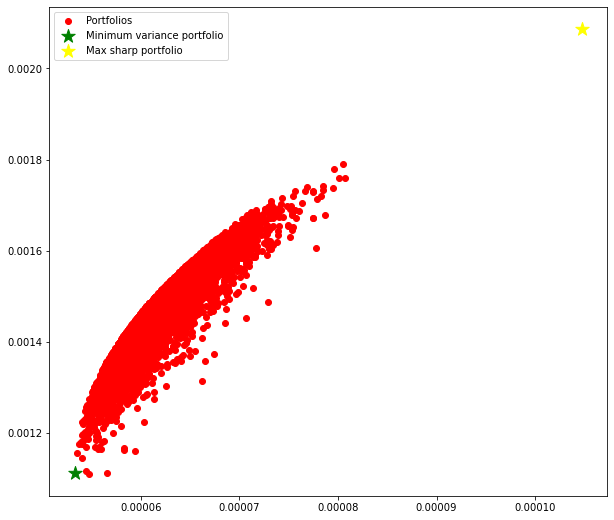

In [28]:
plt.figure(figsize=(10,9))
plt.scatter(df['volatility'],df['returns'], color='red',label='Portfolios')
plt.scatter(min_var_vol,min_var_ret,marker='*',color='green',s=200,label='Minimum variance portfolio')
plt.scatter(max_sharp_vola,max_sharp_reta,marker='*',color='yellow',s=200,label='Max sharp portfolio')

plt.legend(loc='upper left')

In [29]:
#method 2
Pr=repeat(portfolio_ret,Muu,covv,10000)
df1=pd.DataFrame(Pr,columns=['returns','volatility']);df1.head()

,returns,volatility
0,[[0.44456213086581586]],[[0.014490045540907302]]
1,[[0.4220203147541307]],[[0.014134265989132824]]
2,[[0.43629313532392056]],[[0.014884389695026399]]
3,[[0.46462075190736596]],[[0.014630030402824571]]
4,[[0.44452539600016205]],[[0.014298698672465714]]


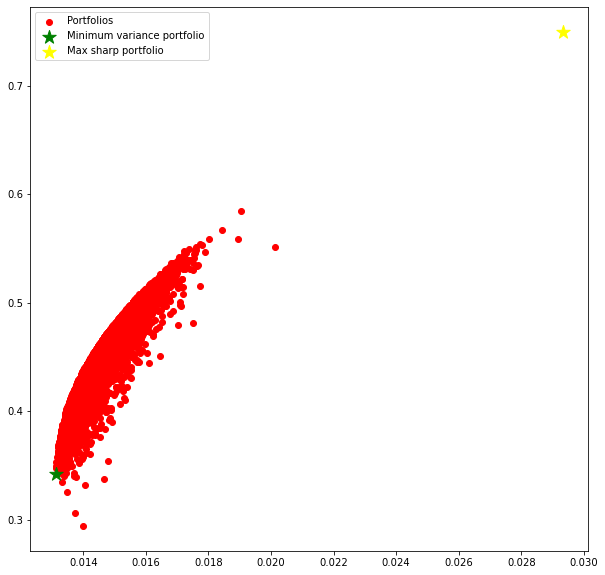

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(df1['volatility'],df1['returns'], color='red',label='Portfolios')
plt.scatter(min_var_vol1,min_var_ret1,marker='*',color='green',s=200,label='Minimum variance portfolio')
plt.scatter(max_sharp_vol,max_sharp_ret,marker='*',color='yellow',s=200,label='Max sharp portfolio')

plt.legend(loc='upper left')

In [32]:

print('min_var_returns:',min_var_ret1)
print('min_var_volatility:',min_var_vol1)

min_var_returns: [[0.3427069]]
min_var_volatility: [[0.01311472]]


# optimizer from libraries

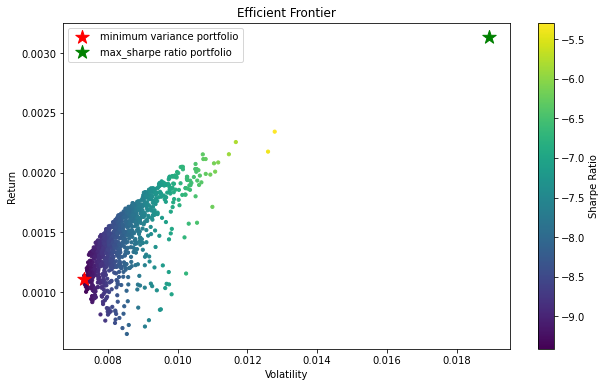

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#declare
np.random.seed(42)
num_assets = 5
num_portfolios = 1000

mean_returns = avg_ret # mean returns of each asset
cov_matrix = cov  # covariance matrix

# portfolio variance function
def portfolio_volatility(weights, mean_returns, cov_matrix):
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return volatility


def random_portfolios(num_portfolios, mean_returns, cov_matrix): #generate random portfolios
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev = portfolio_volatility(weights, mean_returns, cov_matrix)
        results[0,i] = np.sum(weights * mean_returns)  # portfolio return
        results[1,i] = portfolio_std_dev
        results[2,i] = (results[0,i] - 0.07) / results[1,i] #0.0x is risk free rate
    return results, weights_record

# func to min var
def min_variance_portfolio(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    # Constraints: sum of weights equals 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # bounds for each weight where weight is less than or equal to 1
    bounds = tuple((0, 1) for asset in range(num_assets))

    # guess random weight
    initial_guess = num_assets * [1. / num_assets]

    # Minvar portfolio
    min_variance = minimize(portfolio_volatility, initial_guess, args=args,
                            method='SLSQP', bounds=bounds, constraints=constraints)

    return min_variance.x

# max sharpe func
def max_sharpe_ratio_portfolio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)  # Added risk_free_rate parameter

    #sum of weights is 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # bounds for weight
    bounds = tuple((0, 1) for asset in range(num_assets))

  #guess 
    initial_guess = num_assets * [1. / num_assets]

    # minimize negative sharpe.
    def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
        portfolio_return = np.sum(weights * mean_returns)
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
        return -sharpe_ratio

    max_sharpe = minimize(negative_sharpe_ratio, initial_guess, args=args,
                          method='SLSQP', bounds=bounds, constraints=constraints,
                          options={'disp': False})

    return max_sharpe.x

#random portfolios
results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix)

# frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o', s=10)
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')

#minimum variance portfolio
min_variance_weights = min_variance_portfolio(mean_returns, cov_matrix)
min_variance_return = np.sum(min_variance_weights * mean_returns)
min_variance_volatility = portfolio_volatility(min_variance_weights, mean_returns, cov_matrix)
plt.scatter(min_variance_volatility, min_variance_return, marker='*', color='r', s=200, label='minimum variance portfolio')

# plot sharpe ratio portfolio
risk_free_rate = 0.07  # assume some rf
max_sharpe_weights = max_sharpe_ratio_portfolio(mean_returns, cov_matrix, risk_free_rate)
max_sharpe_return = np.sum(max_sharpe_weights * mean_returns)
max_sharpe_volatility = portfolio_volatility(max_sharpe_weights, mean_returns, cov_matrix)
plt.scatter(max_sharpe_volatility, max_sharpe_return, marker='*', color='g', s=200, label='max_sharpe ratio portfolio')


plt.legend()
plt.show()


In [291]:

print('minimum variance portfolio weights:',min_variance_weights)

minimum variance portfolio weights: [0.21122161 0.30887243 0.22020206 0.1968459  0.062858  ]


In [292]:
print('minimum var portfolio return:',min_variance_return*100)


minimum var portfolio return: 0.11131755252557206
minimum var portfolio volatility: 0.730212501889169


# Recheck

In [86]:
print(avg_ret1)
print(cov)

[[0.00041013]
 [0.00053277]
 [0.00157057]
 [0.00162253]
 [0.00313017]]
[[ 2.43282407e-04  8.75135249e-06 -9.31341696e-06  3.54458510e-06
  -8.75446727e-06]
 [ 8.75135249e-06  1.25013427e-04  2.71963247e-05  2.60363644e-05
   2.38036342e-05]
 [-9.31341696e-06  2.71963247e-05  1.63855915e-04  2.86030002e-05
   9.15932350e-05]
 [ 3.54458510e-06  2.60363644e-05  2.86030002e-05  1.94151187e-04
   2.06796423e-05]
 [-8.75446727e-06  2.38036342e-05  9.15932350e-05  2.06796423e-05
   3.58811678e-04]]


In [87]:
m = (avg_ret1-0.07);print(m)

[[-0.06958987]
 [-0.06946723]
 [-0.06842943]
 [-0.06837747]
 [-0.06686983]]


In [88]:
cov_inv=np.linalg.inv(cov);print(cov_inv)

[[ 4136.48501449  -344.26855601   272.78193885   -75.76932294
     58.49717005]
 [ -344.26855601  8511.02673354 -1140.4114149   -942.82493333
   -227.57342377]
 [  272.78193885 -1140.4114149   7429.7664078   -758.03442815
  -1770.58468858]
 [  -75.76932294  -942.82493333  -758.03442815  5396.17088054
    -56.80059934]
 [   58.49717005  -227.57342377 -1770.58468858   -56.80059934
   3258.74951613]]


In [89]:
ones= [1,1,1,1,1]
ones=np.array(ones).reshape(1,5);print(ones)

[[1 1 1 1 1]]


In [90]:
num = cov_inv@m
den1 = ones@cov_inv
den2=den1@m

In [91]:
wt_sharpe=num/den2;print(wt_sharpe)

[[0.21766904]
 [0.31686928]
 [0.21504313]
 [0.18764917]
 [0.06276938]]


In [92]:
print('weights that maximize share is:',wt_sharpe)

weights that maximize share is: [[0.21766904]
 [0.31686928]
 [0.21504313]
 [0.18764917]
 [0.06276938]]


In [93]:
sret = np.transpose(avg_ret1)@wt_sharpe
svol =np.transpose(wt_sharpe)@cov@wt_sharpe

In [94]:
print('max_sharpe returns:',sret)
print('max_sharpe volatility:',svol)

max_sharpe returns: [[0.00109678]]
max_sharpe volatility: [[5.33096736e-05]]


In [95]:
#min var:
min_var_wt = (cov_inv@np.transpose(ones))/(ones@cov_inv@np.transpose(ones));min_var_wt

array([[0.21573811],
       [0.3121138 ],
       [0.21498082],
       [0.18988911],
       [0.06727817]])

In [96]:
minvar_ret=np.transpose(avg_ret1)@min_var_wt
minvar_vol = np.transpose(min_var_wt)@cov@min_var_wt

In [97]:
print('min var returns:',minvar_ret)
print('min var volatility:',minvar_vol)

min var returns: [[0.0011111]]
min var volatility: [[5.32985911e-05]]
